# Machine Learning: Predicting Mortality Rate

In this notebook, I apply a simple machine learning model to examine whether PM2.5 exposure levels and income group information can jointly predict mortality rates across countries.


In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import matplotlib.pyplot as plt


In [2]:
import pandas as pd

df = pd.read_csv("merged_dataset.csv")
df.head()

,Country Name,Country Code,Year,PM25,IncomeGroup,Mortality_Rate
0,Afghanistan,AFG,2020,46.087094,Low income,491.493666
1,Angola,AGO,2020,25.145238,Lower middle income,678.137672
2,Albania,ALB,2020,15.707004,Upper middle income,866.498653
3,Andorra,AND,2020,9.080281,High income,731.302528
4,United Arab Emirates,ARE,2020,36.305503,High income,140.318410


In [3]:
print("Shape:", df.shape)
print(df[['PM25', 'IncomeGroup', 'Mortality_Rate']].isna().sum())

Shape: (172, 6)
PM25              0
IncomeGroup       0
Mortality_Rate    0
dtype: int64


In [5]:
X = df[['PM25', 'IncomeGroup']]
y = df['Mortality_Rate']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])


Train size: 137
Test size: 35


In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

numeric_features = ['PM25']
categorical_features = ['IncomeGroup']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [7]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"R² Score: {r2:.3f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

R² Score: -0.230
RMSE: 270.06
MAE: 222.51


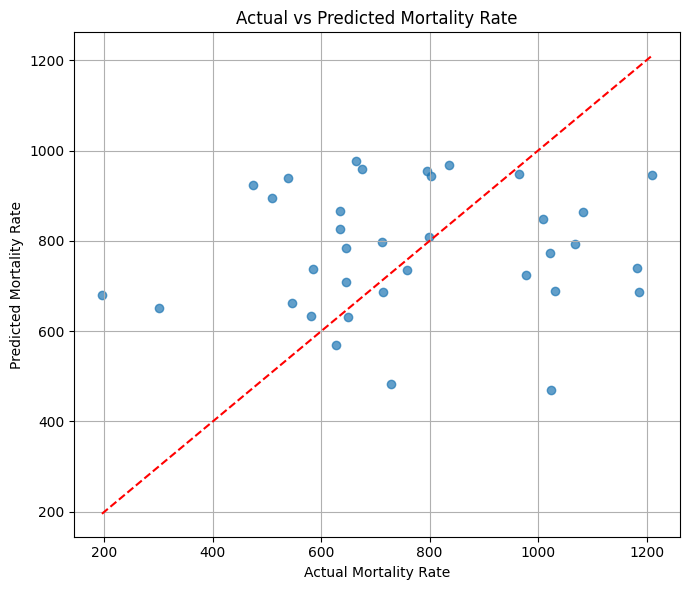

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')

plt.xlabel("Actual Mortality Rate")
plt.ylabel("Predicted Mortality Rate")
plt.title("Actual vs Predicted Mortality Rate")
plt.grid(True)
plt.tight_layout()
plt.show()


In [9]:
feature_names = (
    numeric_features +
    list(model.named_steps['preprocessor']
         .named_transformers_['cat']
         .get_feature_names_out(categorical_features))
)

coefficients = model.named_steps['regressor'].coef_

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

coef_df


,Feature,Coefficient
0,PM25,-6.107657
1,IncomeGroup_Low income,-20.250552
2,IncomeGroup_Lower middle income,-179.817672
3,IncomeGroup_Upper middle income,-105.872500
